In [1]:
#load data science libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import datetime
import time
import json
import requests
import warnings
warnings.filterwarnings('ignore')

In [16]:
#import forecastdemand_nsw.parquet
df_fd = pd.read_parquet('../data/NSW/forecastdemand_nsw.parquet')


#drop the 	PREDISPATCHSEQNO, REGIONID and LASTCHANGED columns
df_fd.drop(['PREDISPATCHSEQNO', 'REGIONID', 'LASTCHANGED'], axis=1, inplace=True)

#order by LASTCHANGED
df_fd = df_fd.sort_values(by='DATETIME')

#show the head and tail of the data
print(df_fd.head())
print(df_fd.tail())

    PERIODID  FORECASTDEMAND             DATETIME
0         71         7832.04  2010-01-01 00:00:00
51        20         7819.50  2010-01-01 00:00:00
50        21         7819.89  2010-01-01 00:00:00
49        22         7817.50  2010-01-01 00:00:00
48        23         7808.85  2010-01-01 00:00:00
          PERIODID  FORECASTDEMAND             DATETIME
10905968        51         6934.59  2021-03-18 00:00:00
10905967        52         6936.11  2021-03-18 00:00:00
10905966        53         6930.46  2021-03-18 00:00:00
10905982        37         6946.14  2021-03-18 00:00:00
10906018         1         7126.37  2021-03-18 00:00:00


In [19]:
#change the DATETIME column to datetime
df_fd['DATETIME'] = pd.to_datetime(df_fd['DATETIME'])

#inspect the data in df_fd
print(df_fd.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10906019 entries, 0 to 10906018
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   PERIODID        int64         
 1   FORECASTDEMAND  float64       
 2   DATETIME        datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 332.8 MB
None


In [20]:
#check for missing values
print(df_fd.isnull().sum())

#no values need to be removed or filled in

PERIODID          0
FORECASTDEMAND    0
DATETIME          0
dtype: int64


In [30]:
#import totaldemand_nsw.csv
df_td = pd.read_csv('../data/NSW/totaldemand_nsw.csv')

#drop the REGIONID column
df_td.drop(['REGIONID'], axis=1, inplace=True)

#change DATETIME to datetime format with dayfirst=True
df_td['DATETIME'] = pd.to_datetime(df_td['DATETIME'], dayfirst=True)

#change the DATETIME column to datetime
df_td['DATETIME'] = pd.to_datetime(df_td['DATETIME'])

#inspect the data in df_td
print(df_td.head())


             DATETIME  TOTALDEMAND
0 2010-01-01 00:00:00      8038.00
1 2010-01-01 00:30:00      7809.31
2 2010-01-01 01:00:00      7483.69
3 2010-01-01 01:30:00      7117.23
4 2010-01-01 02:00:00      6812.03


In [31]:
#check for missing values in df_td
print(df_td.isnull().sum())

#no values need to be removed or filled in

DATETIME       0
TOTALDEMAND    0
dtype: int64


In [37]:
#create a join on the DATETIME column
df = pd.merge(df_fd, df_td, on='DATETIME')

#inspect the data in df
print(df.head())


   PERIODID  FORECASTDEMAND   DATETIME  TOTALDEMAND
0        71         7832.04 2010-01-01       8038.0
1        20         7819.50 2010-01-01       8038.0
2        21         7819.89 2010-01-01       8038.0
3        22         7817.50 2010-01-01       8038.0
4        23         7808.85 2010-01-01       8038.0


In [38]:
#compare the size of df_fd, df_td and df
print(df_fd.shape)
print(df_td.shape)
print(df.shape)


(10906019, 3)
(196513, 2)
(10906019, 4)


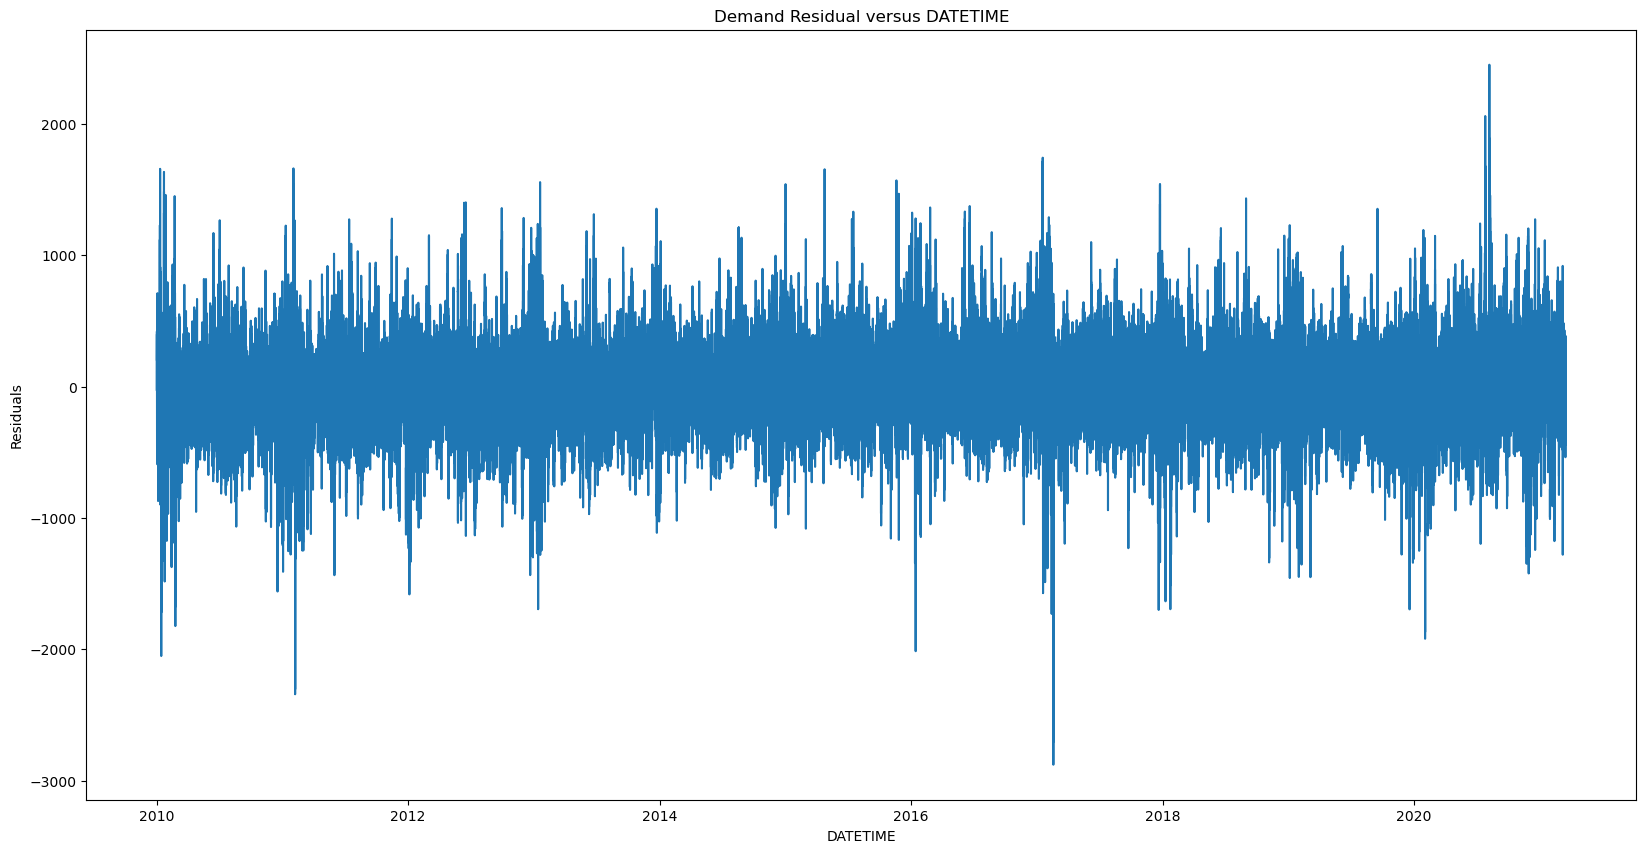

224.7631516948343


In [41]:
#graph the (TOTALDEMAND - FORECASTDEMAND) versus DATETIME
plt.figure(figsize=(20,10))
plt.plot(df['DATETIME'], df['TOTALDEMAND'] - df['FORECASTDEMAND'])
plt.xlabel('DATETIME')
plt.ylabel('Residuals')
plt.title('Demand Residual versus DATETIME')
plt.show()

#print the RMSE of the residuals
print(np.sqrt(np.mean((df['TOTALDEMAND'] - df['FORECASTDEMAND'])**2)))
      
